In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
#torch.set_printoptions(edgeitems=2, linewidth=75)

In [31]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [32]:
def model(t_u, w1, w2, b):
    return w2*t_u**2 + w1*t_u + b

In [33]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [34]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

In [35]:
shuffled_indices = torch.randperm(n_samples)

In [36]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices, val_indices)

tensor([10,  0,  4,  1,  6,  8,  7,  2,  3]) tensor([9, 5])


In [37]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

In [38]:
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [39]:
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [40]:
train_loss_list = []
val_loss_list = []
#epoch_list = []

In [41]:
def training_loop(n_epochs, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        val_loss_list.append(val_loss.item())
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())
        
        if epoch <= 1 or epoch % 500 ==0:
            #epoch_list.append(epoch)
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, "f"Validation loss {val_loss.item():.4f}")
    
    #plt.plot(train_loss_list)
    #plt.xlabel('epoch')
    #plt.ylabel('train loss')
    #plt.title('Training Loss')
    #plt.show()
                  
    #plt.plot(val_loss_list)
    #plt.xlabel('epoch')
    #plt.ylabel('val loss')
    #plt.title('Validation Loss')
    #plt.show()
    
    return params

In [42]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [43]:
t_un = 0.1 * t_u

In [44]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 681.0540, Validation loss 652.1264
Epoch 500, Training loss 3.1562, Validation loss 0.8354
Epoch 1000, Training loss 2.7014, Validation loss 1.0775
Epoch 1500, Training loss 2.3845, Validation loss 1.4007
Epoch 2000, Training loss 2.2373, Validation loss 1.7134
Epoch 2500, Training loss 2.1922, Validation loss 1.9364
Epoch 3000, Training loss 2.1838, Validation loss 2.0523
Epoch 3500, Training loss 2.1829, Validation loss 2.0948
Epoch 4000, Training loss 2.1829, Validation loss 2.1051
Epoch 4500, Training loss 2.1829, Validation loss 2.1066
Epoch 5000, Training loss 2.1829, Validation loss 2.1067


tensor([  2.9546,   0.2415, -11.6784], requires_grad=True)

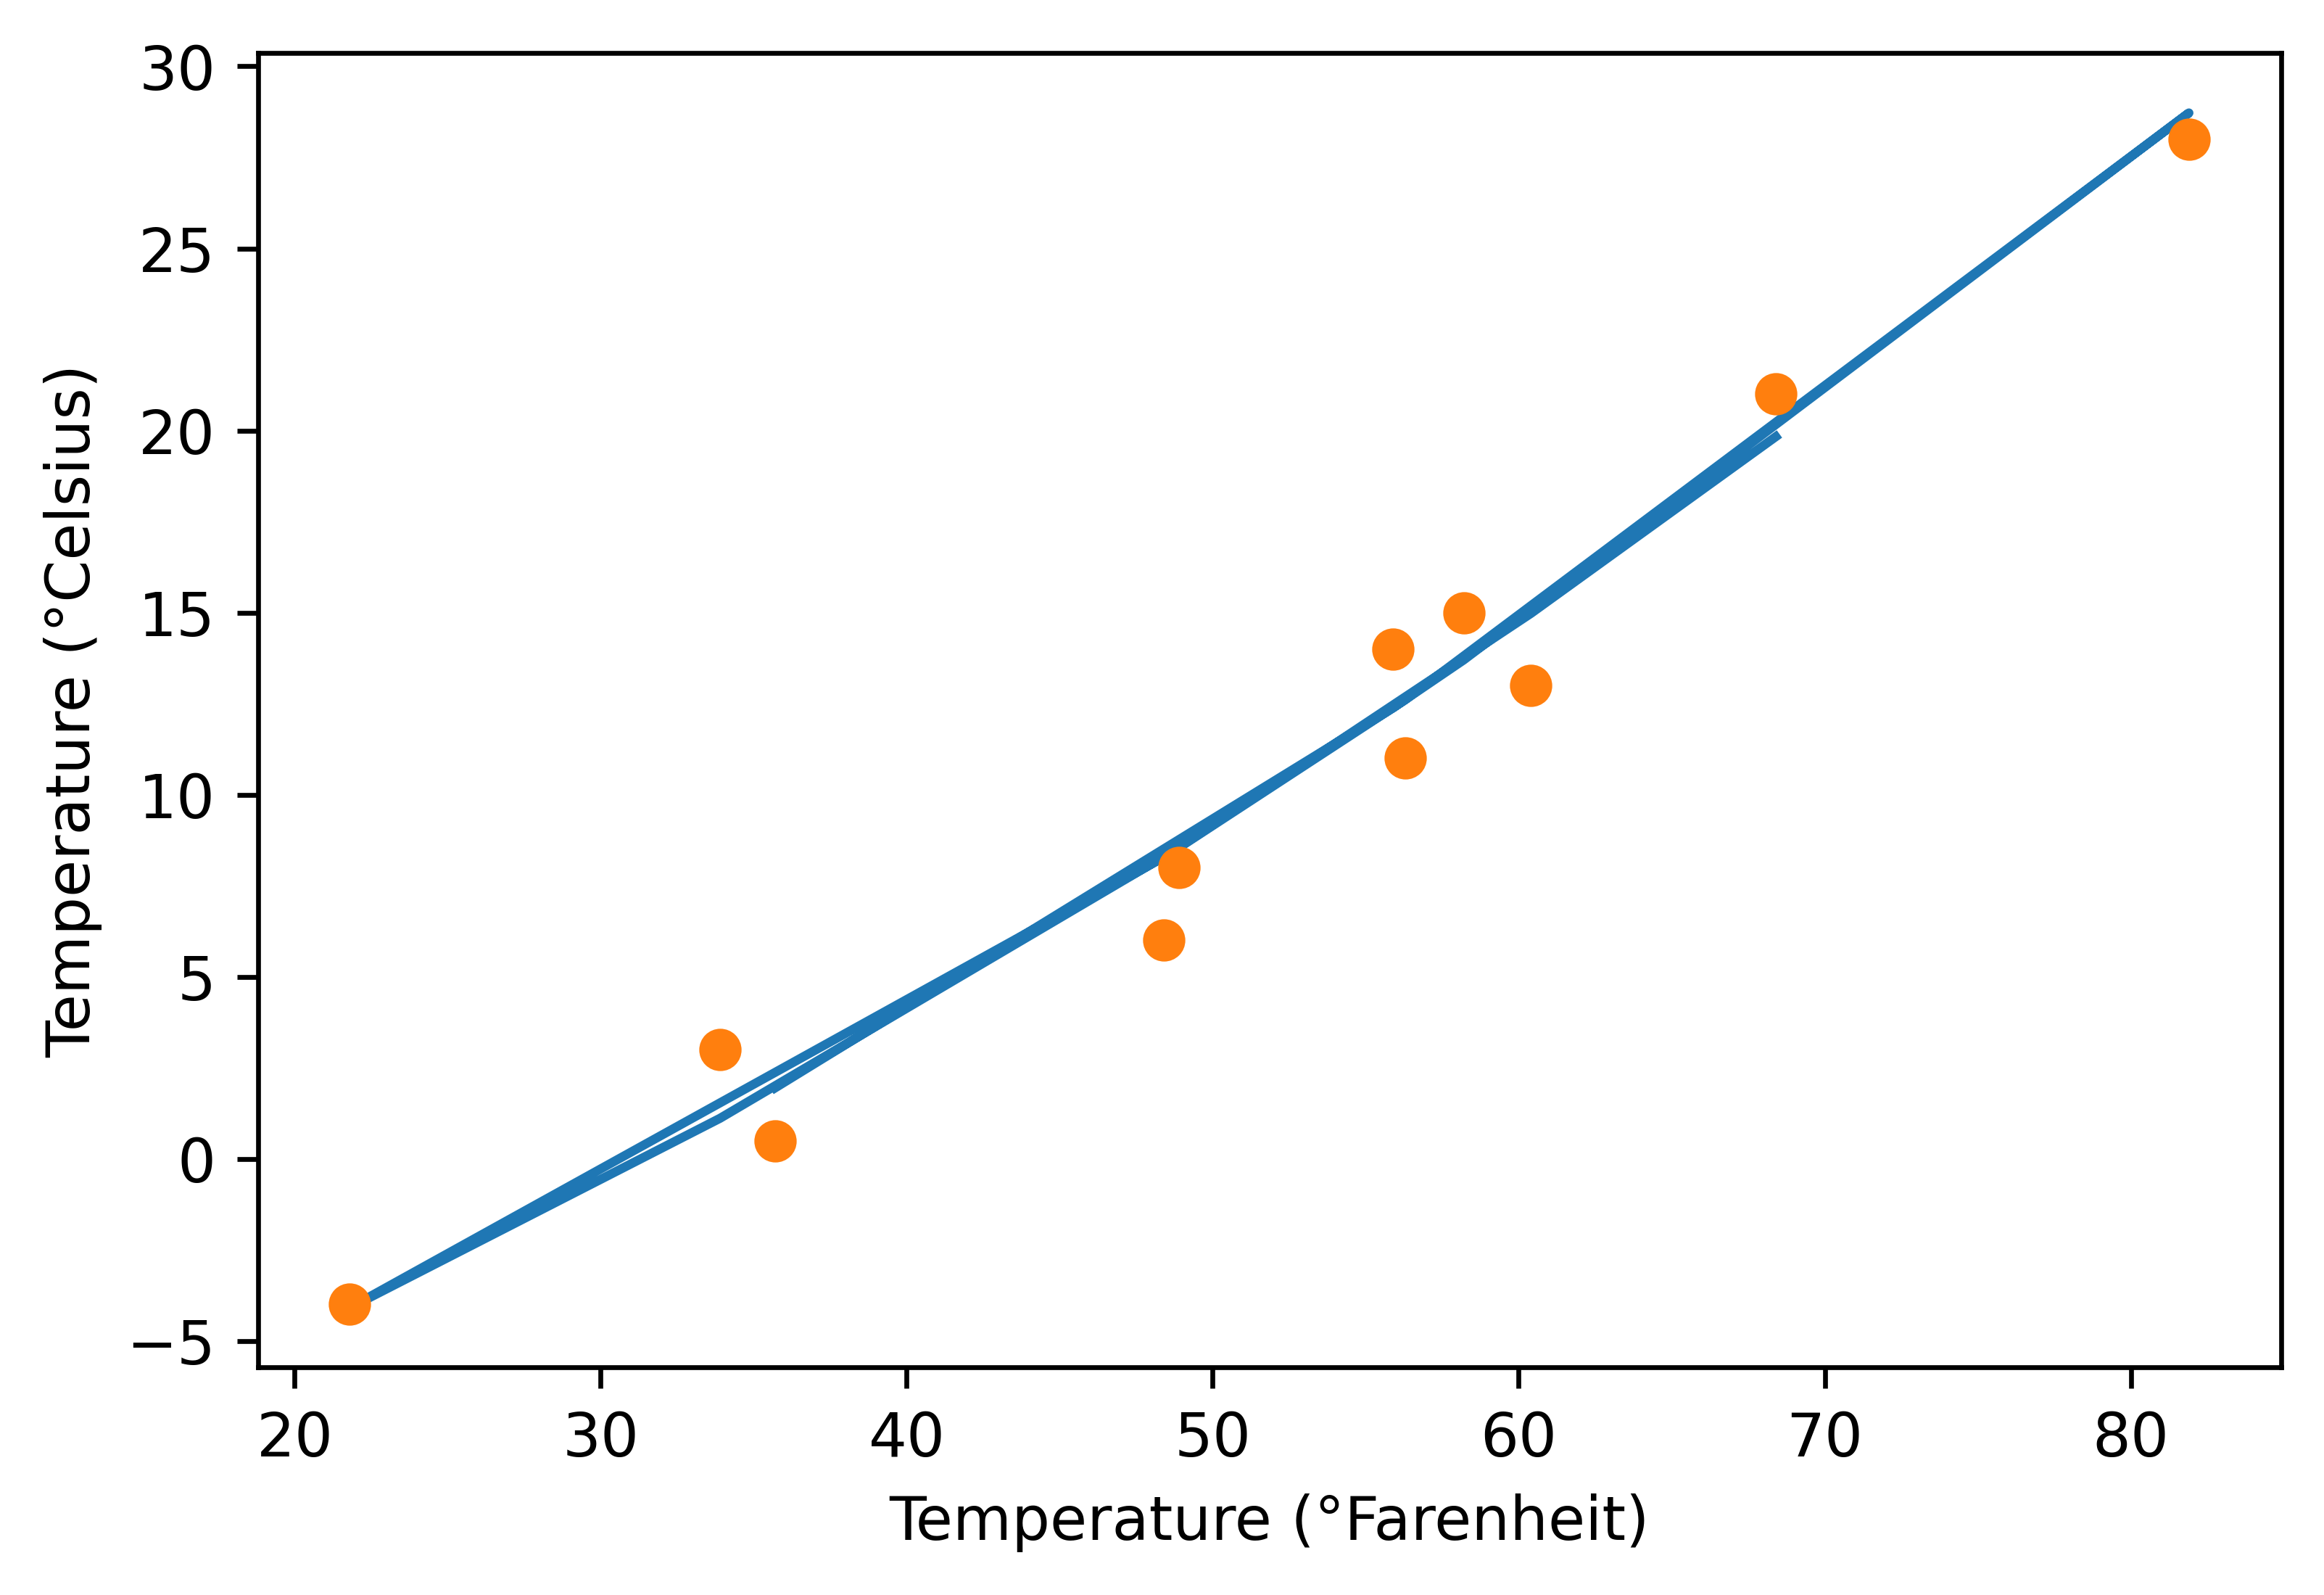

In [45]:
from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel('Temperature (°Farenheit)')
plt.ylabel('Temperature (°Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [46]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 681.0540, Validation loss 652.1264
Epoch 500, Training loss 6.7990, Validation loss 2.0244
Epoch 1000, Training loss 4.3348, Validation loss 1.0901
Epoch 1500, Training loss 3.5464, Validation loss 0.8039
Epoch 2000, Training loss 3.3787, Validation loss 0.7700
Epoch 2500, Training loss 3.2962, Validation loss 0.7870
Epoch 3000, Training loss 3.2040, Validation loss 0.8181
Epoch 3500, Training loss 3.0956, Validation loss 0.8607
Epoch 4000, Training loss 2.9722, Validation loss 0.9169
Epoch 4500, Training loss 2.8376, Validation loss 0.9896
Epoch 5000, Training loss 2.6977, Validation loss 1.0818


tensor([ 0.7652,  0.4435, -6.3316], requires_grad=True)

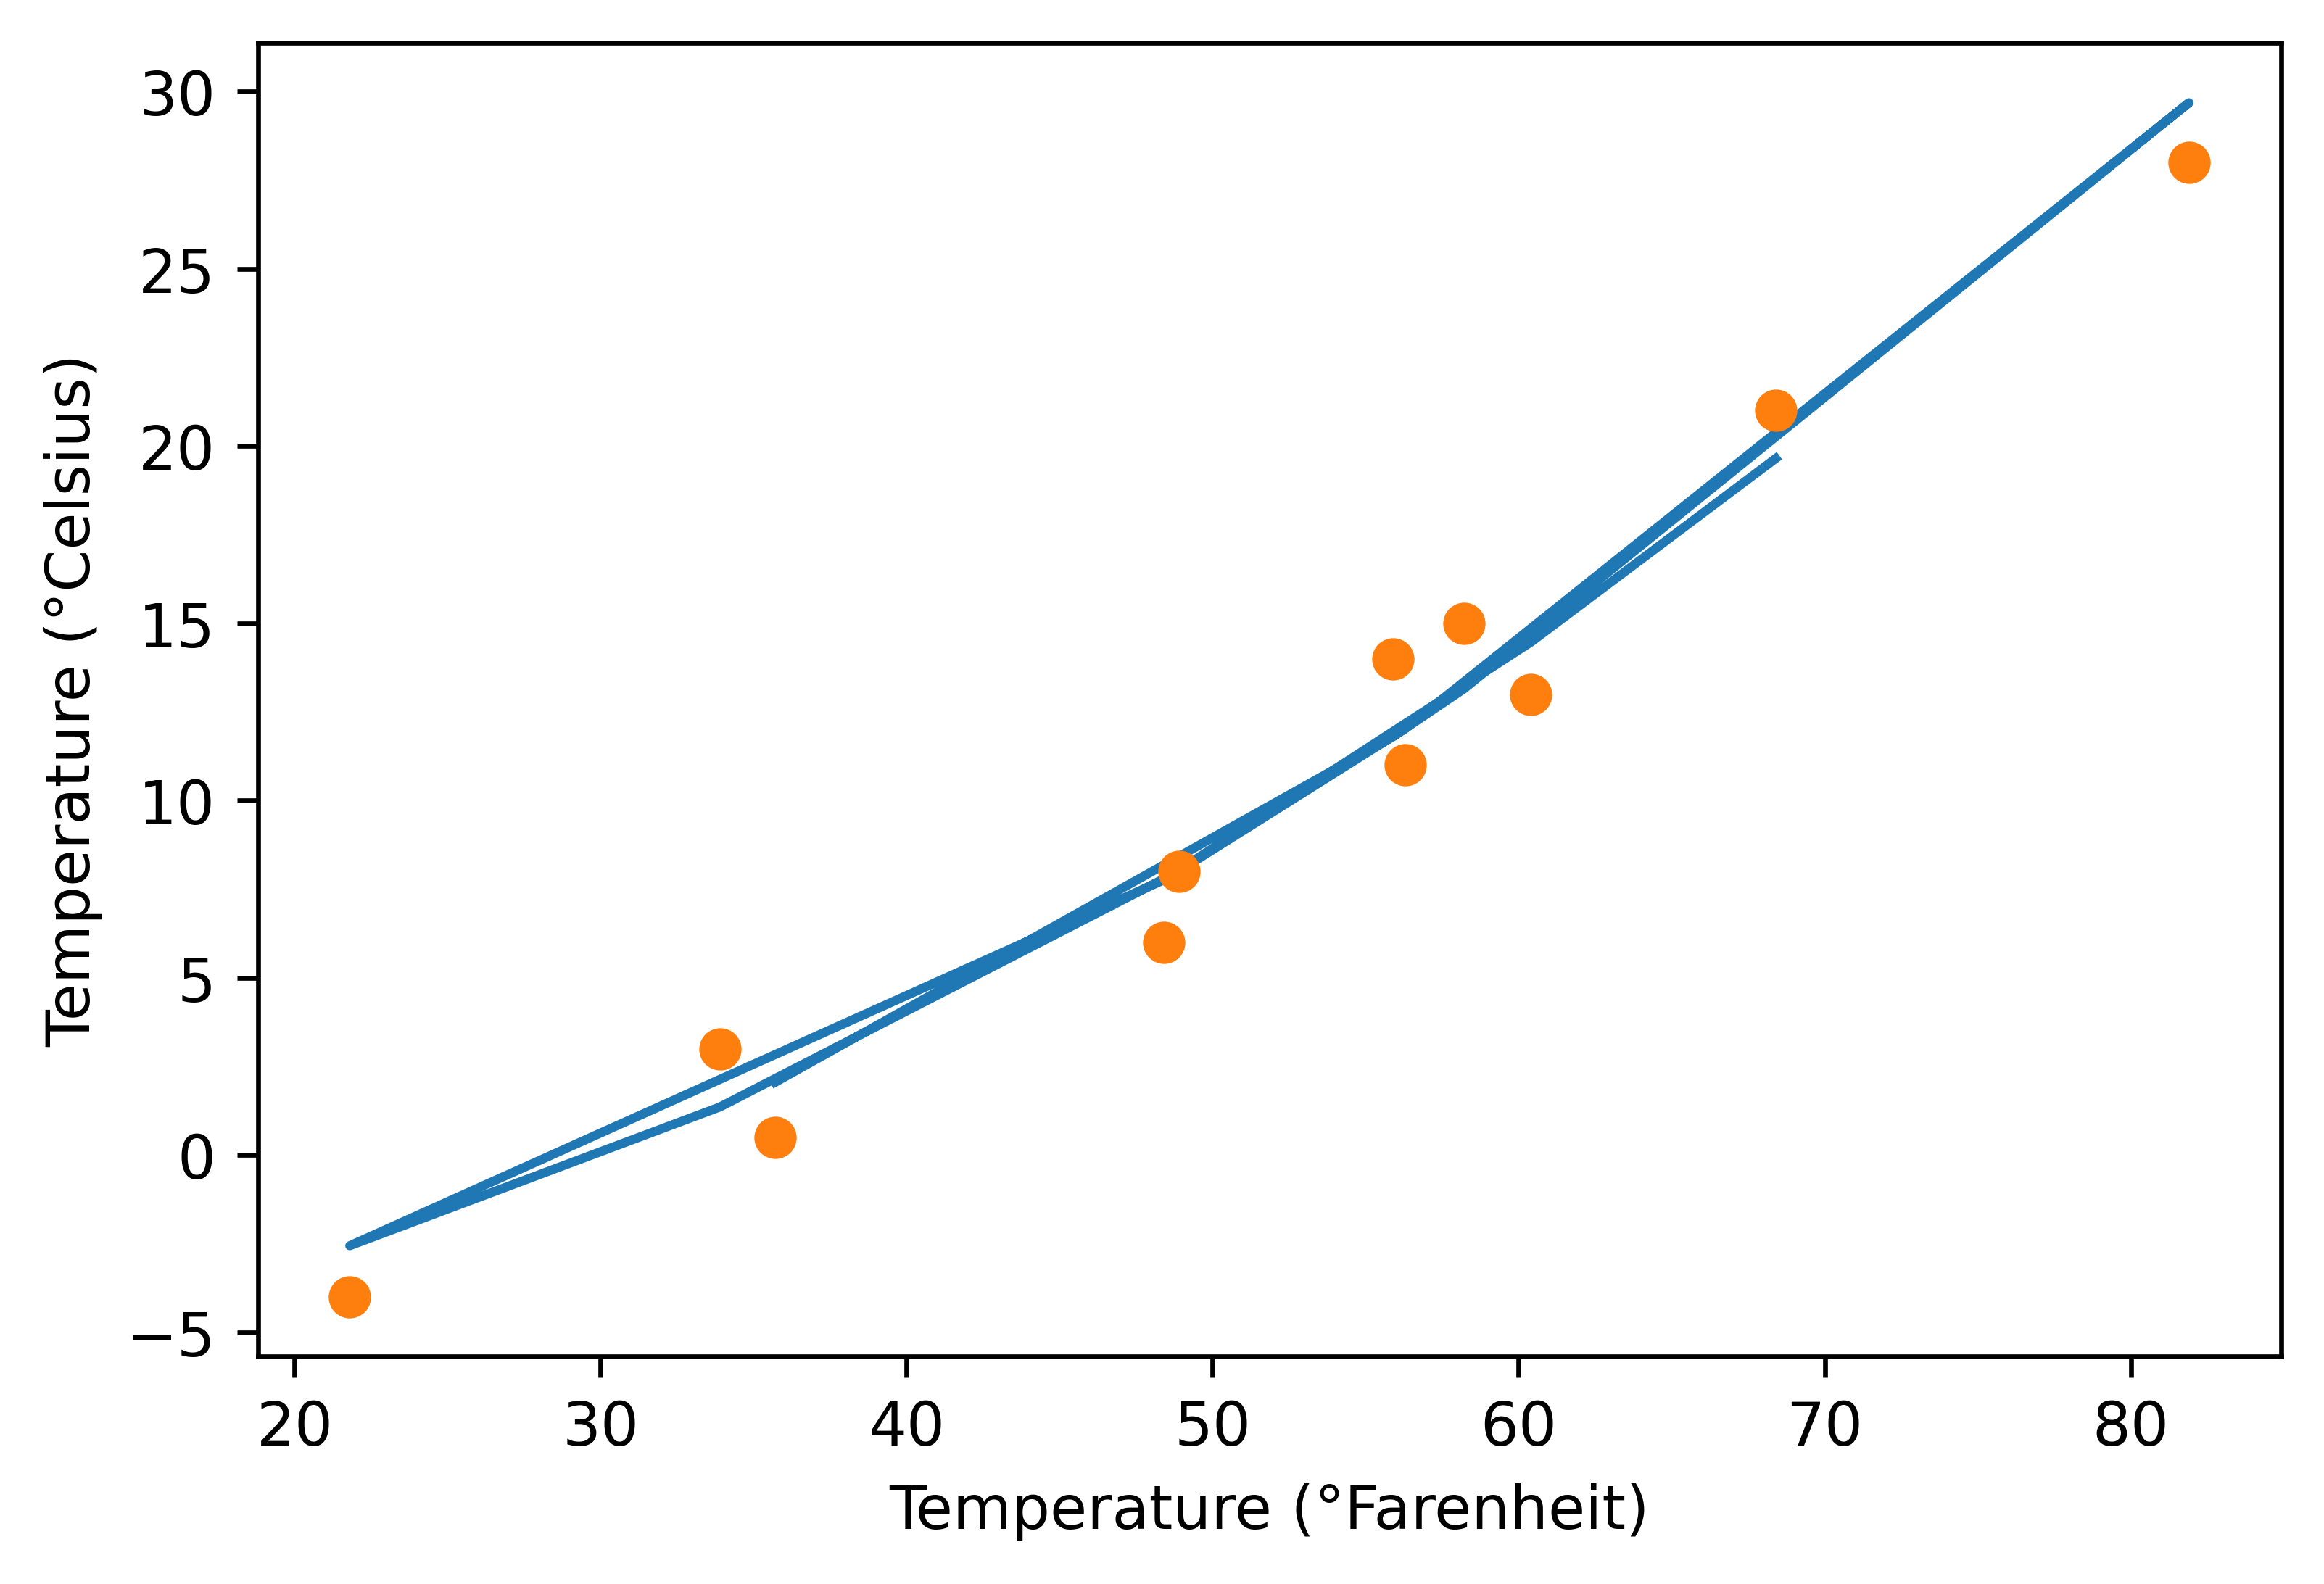

In [47]:
from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel('Temperature (°Farenheit)')
plt.ylabel('Temperature (°Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [48]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 681.0540, Validation loss 652.1264
Epoch 500, Training loss 103.0232, Validation loss 112.5244
Epoch 1000, Training loss 13.9068, Validation loss 13.3805
Epoch 1500, Training loss 9.2225, Validation loss 3.6466
Epoch 2000, Training loss 8.7647, Validation loss 2.8018
Epoch 2500, Training loss 8.2657, Validation loss 2.5853
Epoch 3000, Training loss 7.6868, Validation loss 2.3649
Epoch 3500, Training loss 7.0455, Validation loss 2.1204
Epoch 4000, Training loss 6.3703, Validation loss 1.8621
Epoch 4500, Training loss 5.6991, Validation loss 1.6038
Epoch 5000, Training loss 5.0751, Validation loss 1.3621


tensor([-0.0766,  0.4611, -1.8947], requires_grad=True)

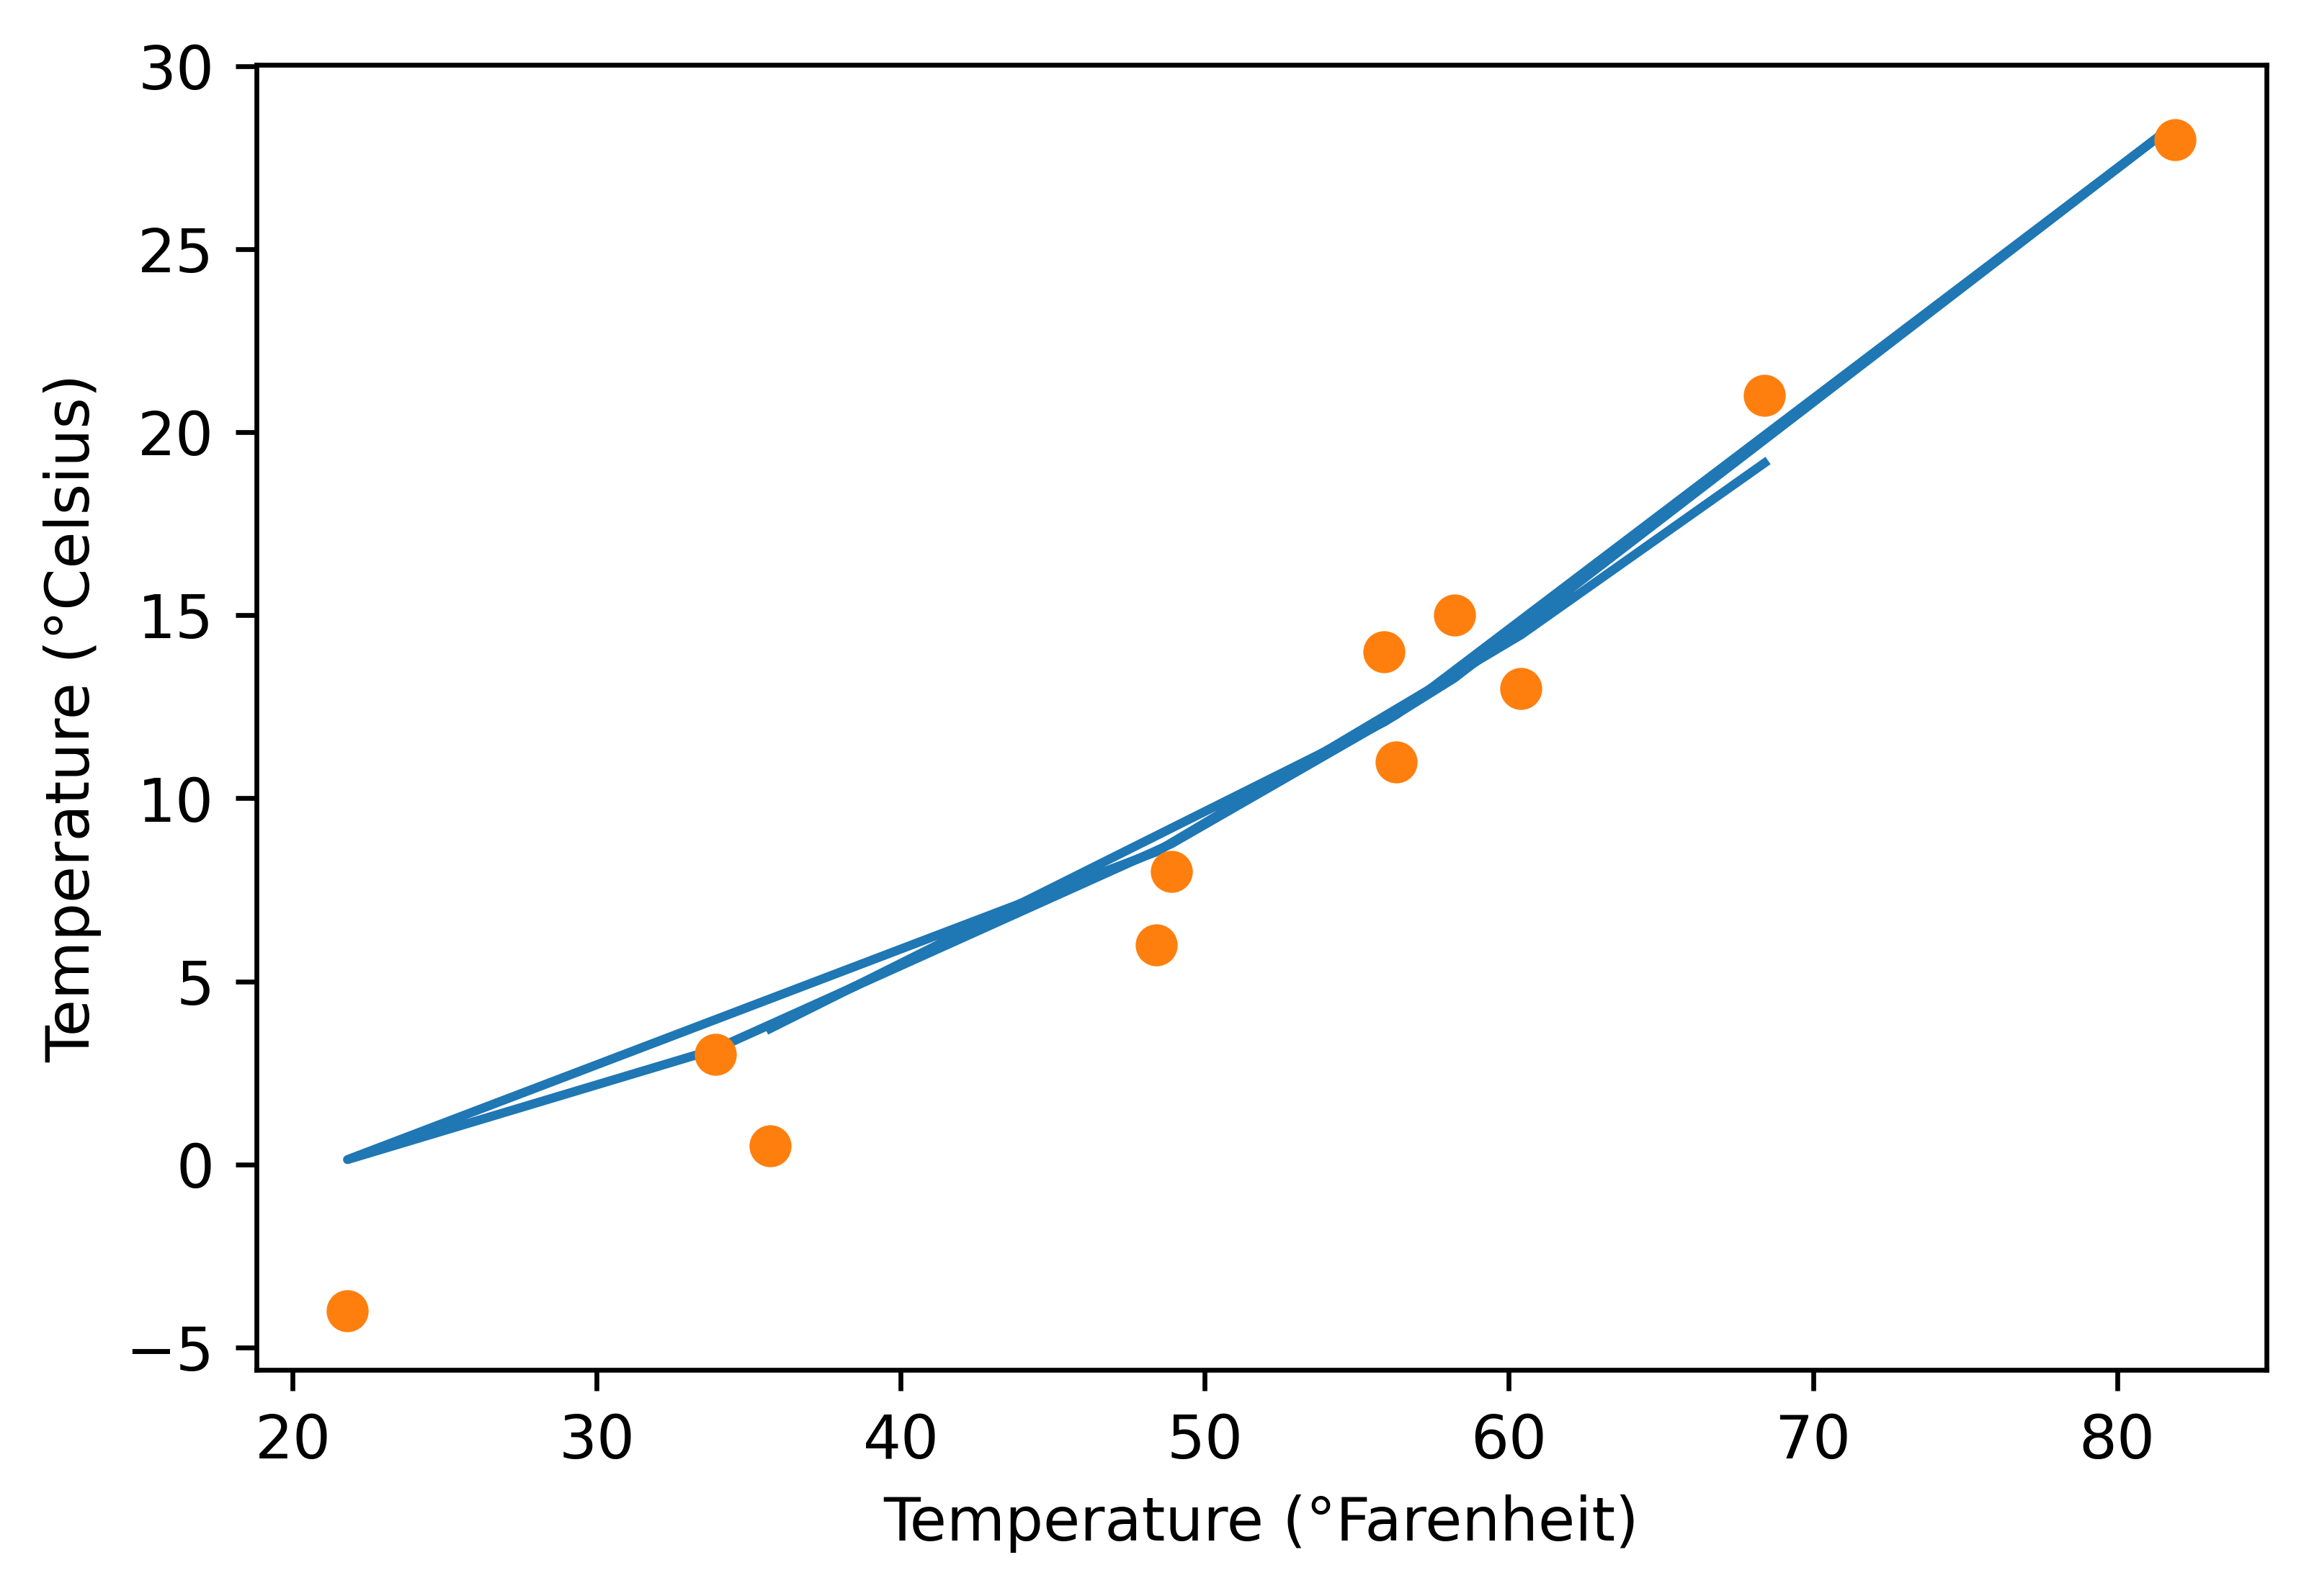

In [49]:
from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel('Temperature (°Farenheit)')
plt.ylabel('Temperature (°Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [50]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 681.0540, Validation loss 652.1264
Epoch 500, Training loss 581.8713, Validation loss 562.0718
Epoch 1000, Training loss 493.5166, Validation loss 481.3679
Epoch 1500, Training loss 415.0762, Validation loss 409.2321
Epoch 2000, Training loss 345.6274, Validation loss 344.8659
Epoch 2500, Training loss 284.4169, Validation loss 287.6200
Epoch 3000, Training loss 230.8257, Validation loss 236.9644
Epoch 3500, Training loss 184.3346, Validation loss 192.4594
Epoch 4000, Training loss 144.4913, Validation loss 153.7281
Epoch 4500, Training loss 110.8828, Validation loss 120.4338
Epoch 5000, Training loss 83.1073, Validation loss 92.2564


tensor([ 0.5707,  0.5732, -0.4335], requires_grad=True)

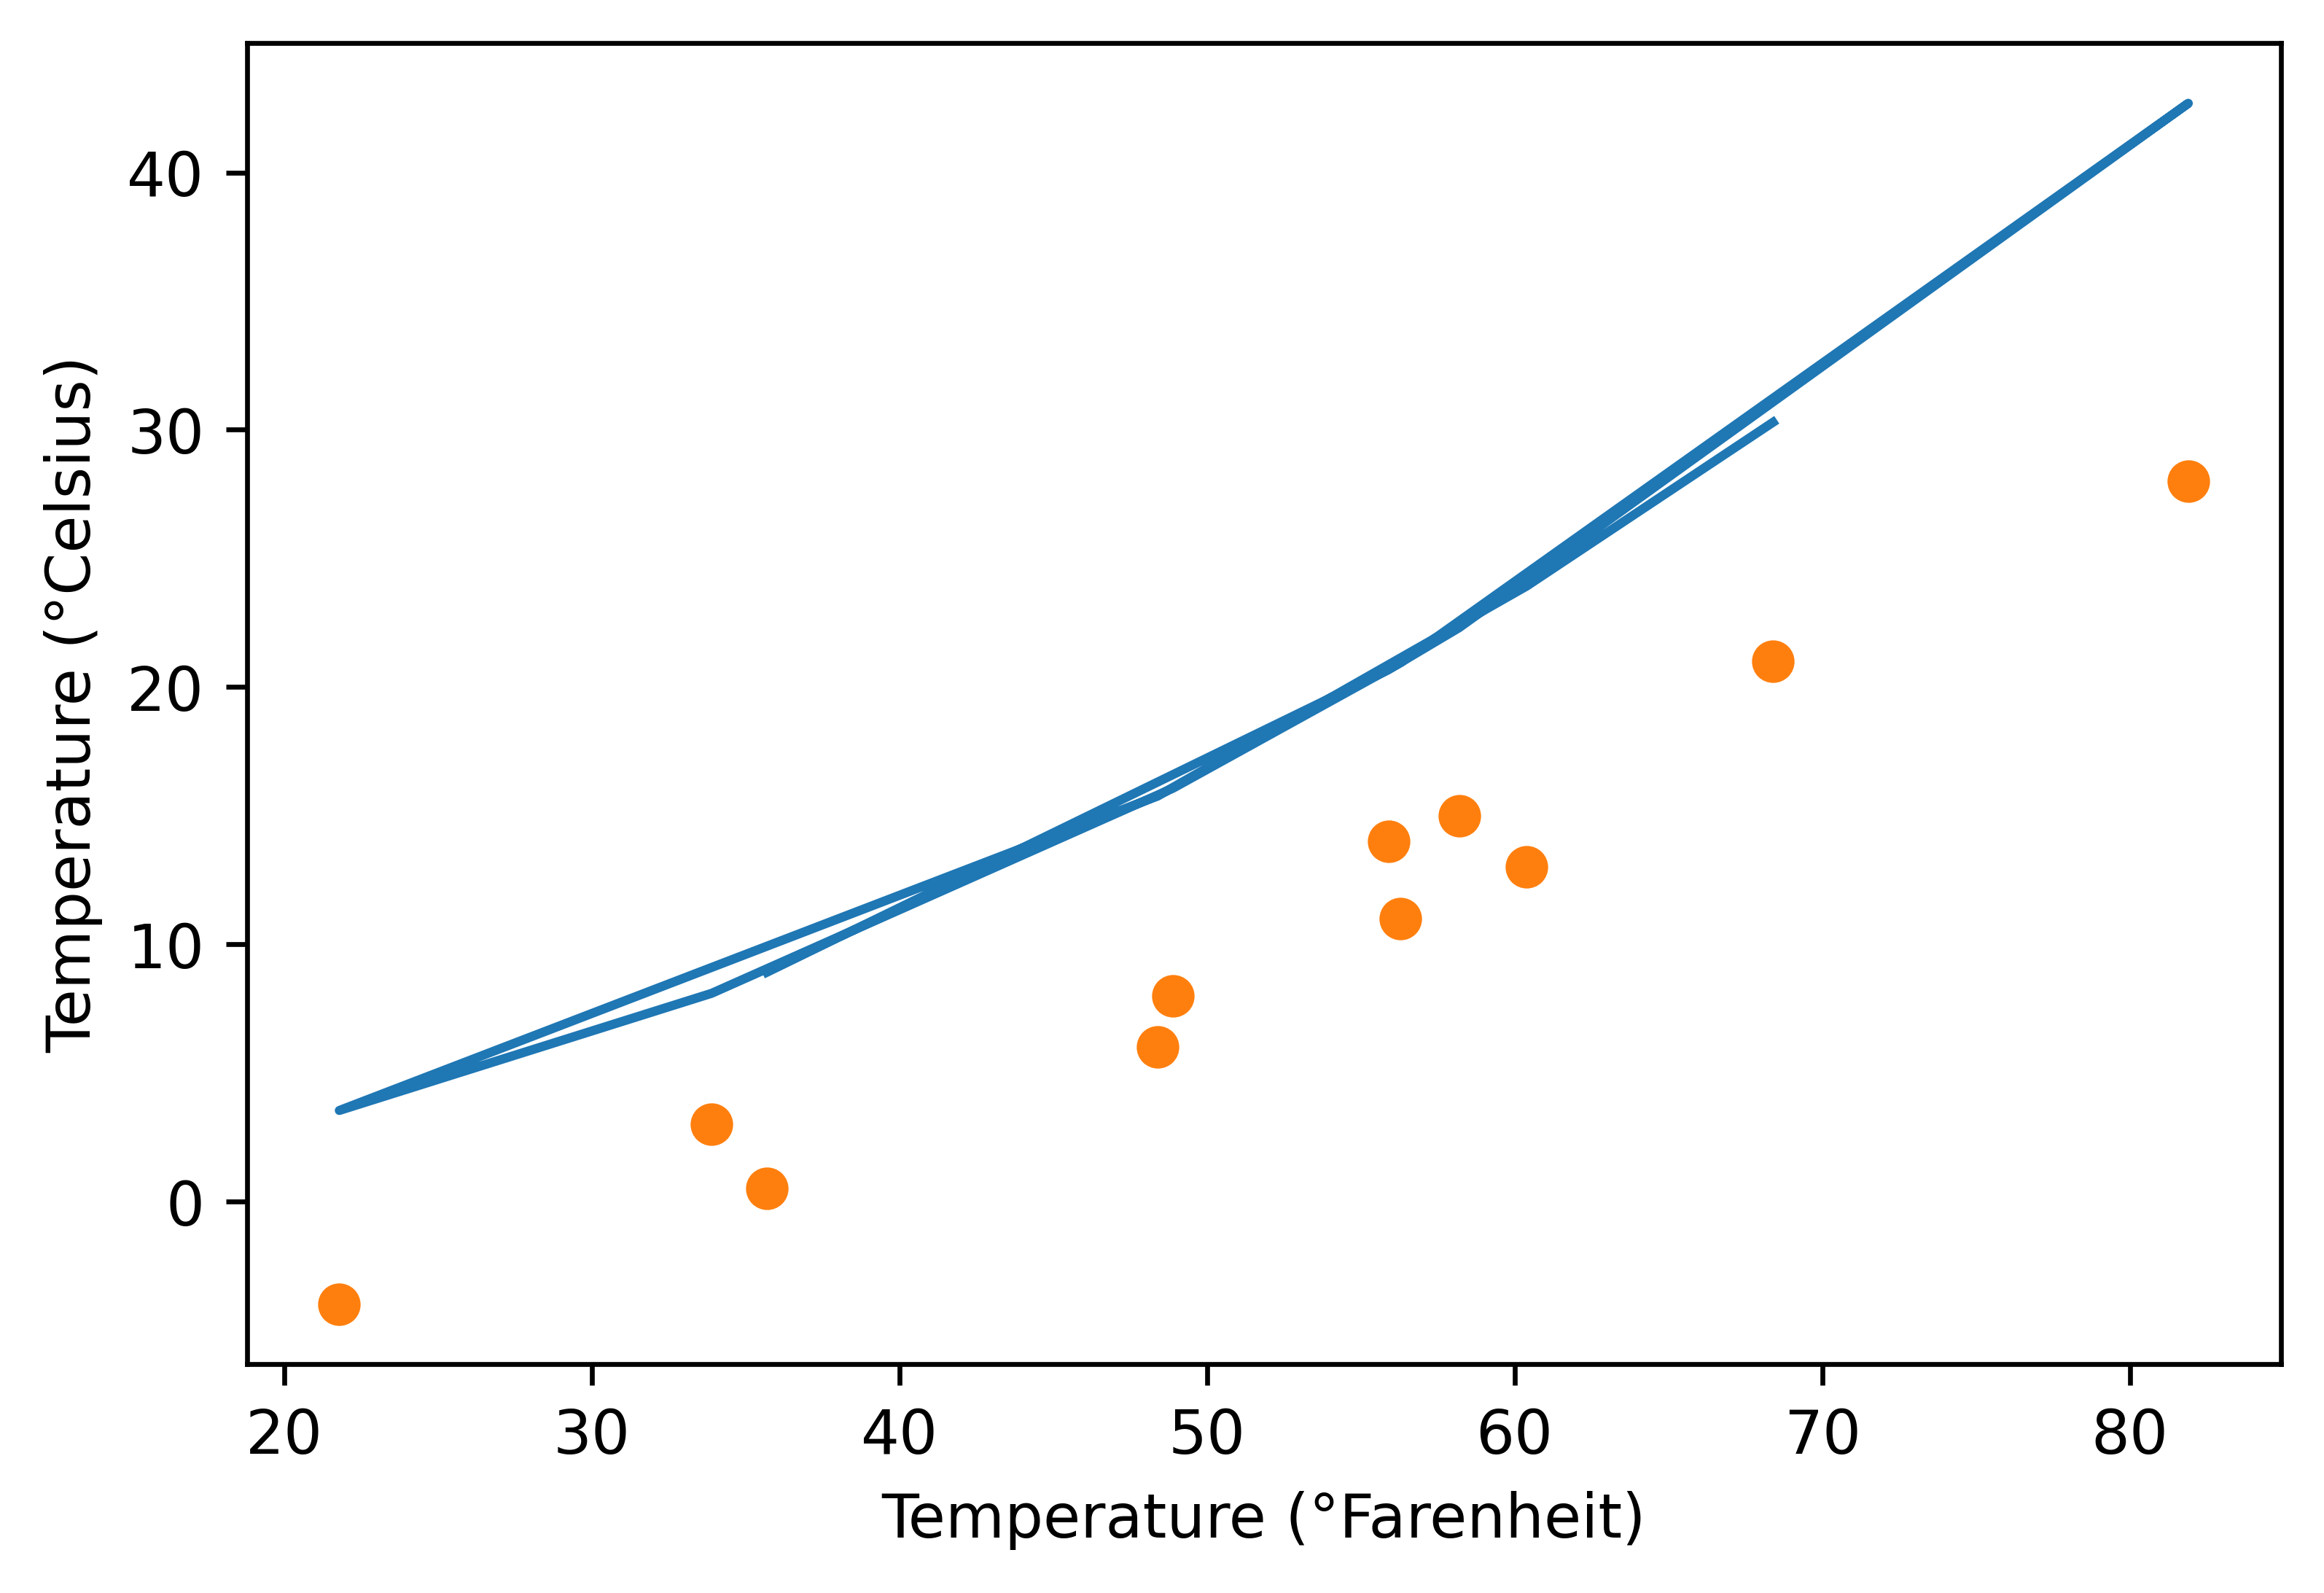

In [51]:
from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel('Temperature (°Farenheit)')
plt.ylabel('Temperature (°Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')